In [1]:
#Import relevant libraries for data analysis

import pandas as pd
import numpy as np

emissions_df = pd.read_csv('/Users/alexandreribeiro/Desktop/Emissions_dataset.csv')

foodwaste_df = pd.read_csv('/Users/alexandreribeiro/Desktop/Food-Waste_dataset.csv')

#Check the first 5 rows of the emissions dataset

emissions_df.head()




FileNotFoundError: [Errno 2] No such file or directory: '/Users/alexandreribeiro/Desktop/Emissions_dataset.csv'

In [21]:
foodwaste_df.head()

,country,year,food_supply_stage,commodity,loss_percentage
0,Angola,2010,Farm,Maize (corn),3.6
1,Angola,2010,Farm,Millet,1.7
2,Angola,2010,Farm,Rice,1.5
3,Angola,2010,Farm,Sorghum,3.0
4,Angola,2010,Farm,Wheat,4.2


In [22]:
#In order to merge the two datasets, we can create a mapping based on the logical correspondence between the food_supply_stage and items.

# Get unique values of 'food_supply_stage' and 'item'

food_supply_stages = foodwaste_df['food_supply_stage'].unique()
items = emissions_df['item'].unique()

food_supply_stages, items

(array(['Farm', 'Harvest', 'Shelling and processing', 'Storage',
        'Transport', 'Households', 'Retail, wholesale and market',
        'Whole supply chain', 'Distribution and export', 'Packing'],
       dtype=object),
 array(['Agrifood Systems Waste Disposal', 'Crop Residues',
        'Food Household Consumption', 'Food Packaging', 'Food Processing',
        'Food Retail', 'Food Transport', 'Manure Management',
        'Manure applied to Soils', 'Manure left on Pasture',
        'Rice Cultivation', 'Synthetic Fertilizers'], dtype=object))

In [23]:
# Create a mapping dictionary for food_supply_stage to item

mapping = {
    'Farm': ['Crop Residues', 'Rice Cultivation', 'Synthetic Fertilizers'],
    'Harvest': ['Crop Residues'],
    'Shelling and processing': ['Food Processing'],
    'Storage': ['Food Processing'],  # No direct item mapping
    'Transport': ['Food Transport'],
    'Households': ['Food Household Consumption'],
    'Retail, wholesale and market': ['Food Retail'],
    'Whole supply chain': ['Food Transport'],  # Aggregate, not mapped to a single item
    'Distribution and export': ['Food Transport'],
    'Packing': ['Food Packaging']
}

#Function to apply mapping and filter the emissions dataset

def map_stages(row):
    for stage, items in mapping.items():
        if row['item'] in items:
            return stage
    return np.nan

# Apply the mapping function to create a new column in the emissions dataset

emissions_df['food_supply_stage'] = emissions_df.apply(map_stages, axis=1)

# Check the first 5 rows of the updated emissions dataset

emissions_df.head()



,country,year,element,item,unit,value,food_supply_stage
0,Angola,2010,Carbon Dioxide (CO2),Agrifood Systems Waste Disposal,kt,1134.35,NaN
1,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm
2,Angola,2010,Carbon Dioxide (CO2),Food Household Consumption,kt,281.49,Households
3,Angola,2010,Carbon Dioxide (CO2),Food Packaging,kt,8.13,Packing
4,Angola,2010,Carbon Dioxide (CO2),Food Processing,kt,0.00,Shelling and processing


In [27]:
# Merge the two datasets on 'country' 'year' and 'food_supply_stage'

merged_df = pd.merge(emissions_df, foodwaste_df, on=['country', 'year', 'food_supply_stage'])

# Check the first 5 rows of the merged dataset

merged_df.food_supply_stage.value_counts()

food_supply_stage
Farm                            11208
Shelling and processing          3810
Transport                        2694
Retail, wholesale and market      615
Households                         84
Packing                            78
Name: count, dtype: int64

In [45]:
merged_df.head()

,country,year,element,item,unit,value,food_supply_stage,commodity,loss_percentage
0,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Maize (corn),3.6
1,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Millet,1.7
2,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Rice,1.5
3,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Sorghum,3.0
4,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Wheat,4.2


In [47]:
#Describe value and loss_percentage

merged_df[['value', 'loss_percentage']].describe().round(2)

,value,loss_percentage
count,18489.00,18489.00
mean,1579.97,3.29
std,11347.12,4.50
min,0.00,0.00
25%,0.04,1.50
50%,2.93,2.00
75%,124.95,3.50
max,171822.50,63.00


commodity
Maize (corn)          3877
Rice                  3129
Sorghum               3069
Millet                2977
Wheat                 1629
                      ... 
Bambara beans, dry       3
Sweet potatoes           3
Plums and sloes          3
Figs                     3
Watermelons              3
Name: count, Length: 100, dtype: int64

JOSE PEDRO

In [33]:
import pandas as pd
import numpy as np

df_third = pd.read_csv('C:\\Users\\USER\\Documents\\GitHub\\Project1\\Merged_dataset.csv')

In [34]:
#change name of column value to quantity of emissions
df_third.rename(columns = {'value':'quantity_emissions'}, inplace = True)

In [35]:
df_third.head(3)

,country,year,element,item,unit,quantity_emissions,food_supply_stage,commodity,loss_percentage
0,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Maize (corn),3.6
1,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Millet,1.7
2,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Rice,1.5


In [36]:
#top10 countries with most quantity_emisions
top10_emissions = df_third.groupby('country')['quantity_emissions'].sum().sort_values(ascending=False).head(10)

In [40]:
top10_emissions

country
India                                                   20736779.89
United States of America                                 1744946.96
China                                                    1613273.01
Nigeria                                                   803545.10
Bangladesh                                                610907.11
United Republic of Tanzania                               348285.36
United Kingdom of Great Britain and Northern Ireland      316773.01
Guinea                                                    251318.08
Philippines                                               217364.78
Ethiopia                                                  209082.39
Name: quantity_emissions, dtype: float64

In [60]:
#for those top10_emissions pick the food_supply_stage with most quantity_emissions and the respective quantity_emissions with the type of element in a pivot table
top10_emissions_stage = df_third[df_third['country'].isin(top10_emissions.index)].groupby(['country', 'food_supply_stage'])['quantity_emissions'].sum().reset_index()

In [61]:
top10_emissions_stage

,country,food_supply_stage,quantity_emissions
0,Bangladesh,Farm,602193.41
1,Bangladesh,"Retail, wholesale and market",7587.34
2,Bangladesh,Shelling and processing,0.00
3,Bangladesh,Transport,1126.36
4,China,Farm,1075539.80
5,China,Households,153935.16
6,China,"Retail, wholesale and market",123691.17
7,China,Shelling and processing,260106.88
8,Ethiopia,Farm,194336.86
9,Ethiopia,"Retail, wholesale and market",157.19


In [62]:
#now pick the food_supply_stage with most quantity_emissions for each country always in a pivot table
top10_emissions_stage_max = top10_emissions_stage.loc[top10_emissions_stage.groupby('country')['quantity_emissions'].idxmax()]

In [64]:
top10_emissions_stage_max.reset_index(drop=True, inplace=True)

In [65]:
top10_emissions_stage_max

,country,food_supply_stage,quantity_emissions
0,Bangladesh,Farm,602193.41
1,China,Farm,1075539.80
2,Ethiopia,Farm,194336.86
3,Guinea,Farm,251318.08
4,India,Farm,20079650.56
5,Nigeria,Farm,770273.96
6,Philippines,Farm,204512.38
7,United Kingdom of Great Britain and Northern I...,Farm,133541.66
8,United Republic of Tanzania,Farm,334933.54
9,United States of America,"Retail, wholesale and market",1519243.82


In [70]:
#i would like to know from these pivot table which element has the most quantity_emissions
top10_emissions_stage_max_element = df_third[df_third['country'].isin(top10_emissions_stage_max['country'])].groupby(['country', 'food_supply_stage', 'element'])['quantity_emissions'].sum().reset_index()

In [71]:
top10_emissions_stage_max_element

,country,food_supply_stage,element,quantity_emissions
0,Bangladesh,Farm,Carbon Dioxide (CO2),585702.62
1,Bangladesh,Farm,Methane (CH4),16032.45
2,Bangladesh,Farm,Nitrous Oxide (N2O),458.34
3,Bangladesh,"Retail, wholesale and market",Carbon Dioxide (CO2),7587.18
4,Bangladesh,"Retail, wholesale and market",Methane (CH4),0.16
...,...,...,...,...
102,United States of America,"Retail, wholesale and market",Methane (CH4),38.97
103,United States of America,"Retail, wholesale and market",Nitrous Oxide (N2O),21.47
104,United States of America,Shelling and processing,Carbon Dioxide (CO2),121720.11
105,United States of America,Shelling and processing,Methane (CH4),54.24


In [72]:
#from top10_emissions_stage_max_element i would like to know the element and the food_supply_stage with the most quantity_emissions for each country
top10_emissions_stage_max_element_max = top10_emissions_stage_max_element.loc[top10_emissions_stage_max_element.groupby('country')['quantity_emissions'].idxmax()]

In [73]:
top10_emissions_stage_max_element_max

,country,food_supply_stage,element,quantity_emissions
0,Bangladesh,Farm,Carbon Dioxide (CO2),585702.62
12,China,Farm,Carbon Dioxide (CO2),1057404.37
24,Ethiopia,Farm,Carbon Dioxide (CO2),193288.40
36,Guinea,Farm,Carbon Dioxide (CO2),243106.80
39,India,Farm,Carbon Dioxide (CO2),19676132.61
48,Nigeria,Farm,Carbon Dioxide (CO2),749686.95
60,Philippines,Farm,Carbon Dioxide (CO2),198060.20
72,United Kingdom of Great Britain and Northern I...,Farm,Carbon Dioxide (CO2),133098.02
83,United Republic of Tanzania,Farm,Carbon Dioxide (CO2),325569.58
101,United States of America,"Retail, wholesale and market",Carbon Dioxide (CO2),1519183.38


In [75]:
# in top10_emissions_stage_max_element_max i would like to change the countries name United Republic of Tanzania to Tanzania and United States of America to USA and United Kingdom of Great Britain and Northern Ireland to UK
top10_emissions_stage_max_element_max['country'] = top10_emissions_stage_max_element_max['country'].replace({'United Republic of Tanzania':'Tanzania', 'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland':'UK'})

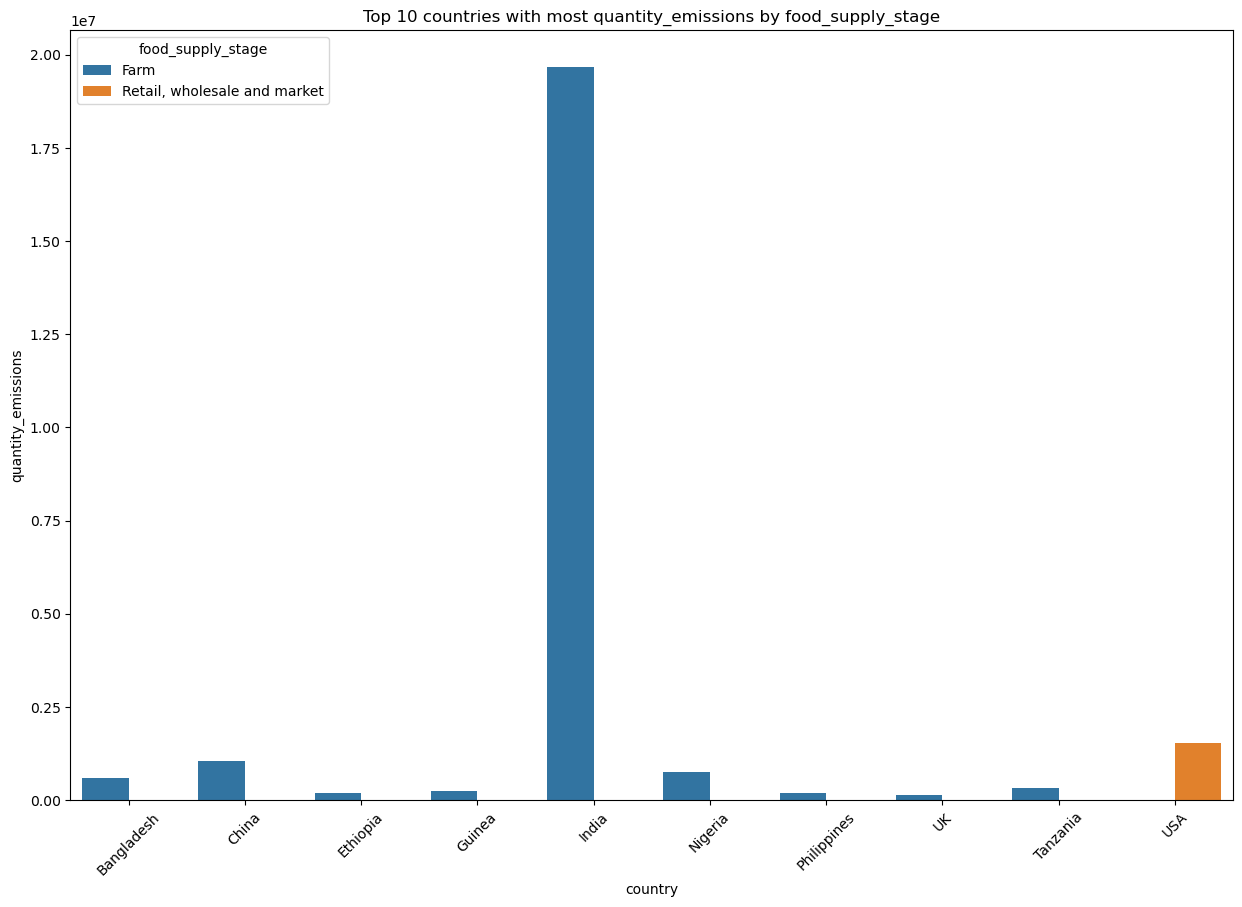

In [76]:
#top10_emissions_stage_max_element_max in a graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.barplot(data=top10_emissions_stage_max_element_max, x='country', y='quantity_emissions', hue='food_supply_stage')
plt.title('Top 10 countries with most quantity_emissions by food_supply_stage')
plt.ylabel('quantity_emissions')
plt.xlabel('country')
plt.xticks(rotation=45)
plt.show()